<a href="https://colab.research.google.com/github/imelike/Derin_Ogrenme_notlar/blob/main/23_24_MLP_HF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [ ]:
veri=loadtxt('pima-indians-diabetes.csv',delimiter=',')
#veri=pd.read_csv('pima-indians-diabetes.csv')
#veri.head()

In [ ]:
X=veri[:,0:8]
y=veri[:,8]
X.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)

(77, 8)

In [ ]:
mlp=Sequential()
mlp.add(Dense(64,input_dim=8,activation='relu'))
mlp.add(Dense(64,activation='relu'))
mlp.add(Dense(1,activation='sigmoid'))

mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

mlp.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
history=mlp.fit(X_train,y_train,epochs=50, batch_size=8,validation_data=(X_val,y_val),verbose=0 )
#history=mlp.fit(X_train,y_train,epochs=50, batch_size=8,validation_split=0.10 )

In [ ]:
mlp.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 2858.9780 - accuracy: 0.6753


[2858.97802734375, 0.6753246784210205]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


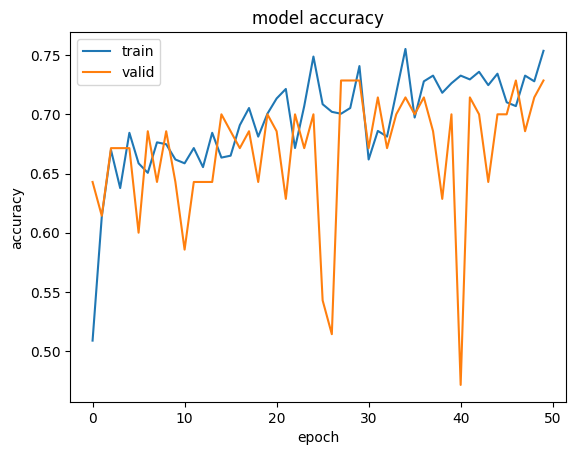

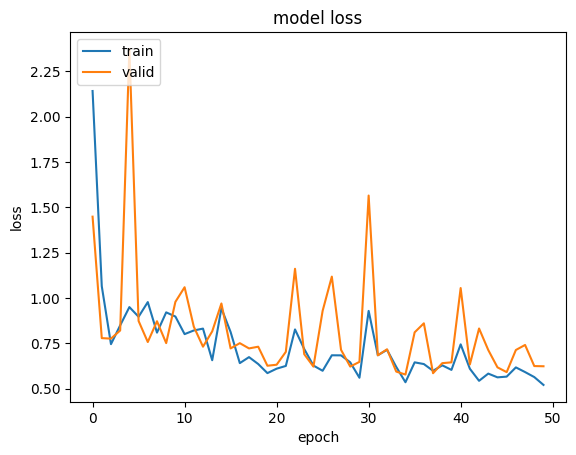

In [ ]:
import platform
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
pred=[]
#pred=mlp.predict(X_test)
pred=(mlp.predict(X_test)>=0.5).astype(int)
#pred[pred<0.5]=0
#pred[pred>=.5]=1
#predIdx=mlp.predict(X_test)
#pred=np.argmax(predIdx,axis=1)
y_pred=[]

for i in pred:
  y_pred.append(i[0])

from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)


3/3 [==============================] - 0s 4ms/step


array([[50,  3],
       [16,  8]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        53
         1.0       0.73      0.33      0.46        24

    accuracy                           0.75        77
   macro avg       0.74      0.64      0.65        77
weighted avg       0.75      0.75      0.72        77



In [ ]:
from sklearn.metrics import classification_report